In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy import stats 
import scipy.stats as st
from scipy.stats import linregress
import pandas as pd
import numpy as np
import seaborn as sns
import os
import csv

In [2]:
owid_path = "./owid-covid-data.csv"

In [3]:
owid = pd.read_csv(owid_path, low_memory=False, encoding="utf-8")

In [4]:
owid_2 = owid[["location", "date", "total_cases", "total_deaths","population", "population_density", "median_age", "aged_65_older"]]

In [5]:
countries = ["China", "Japan", "New Zealand", "United Kingdom", "Italy", "Sweden", "United States", "Brazil"]
magic = "|".join(countries)

owid_df = owid_2[owid_2["location"].str.contains(magic,regex=True)]

In [6]:
owid_df[owid_df.location.isin(['United States', 'China', 'Italy', 'Sweeden', 'UK', 'Japan', 'New Zealand', 'Brazil'])]


,location,date,total_cases,total_deaths,population,population_density,median_age,aged_65_older
6743,Brazil,12/31/2019,NaN,NaN,212559409.0,25.040,33.5,8.552
6744,Brazil,1/1/2020,NaN,NaN,212559409.0,25.040,33.5,8.552
6745,Brazil,1/2/2020,NaN,NaN,212559409.0,25.040,33.5,8.552
6746,Brazil,1/3/2020,NaN,NaN,212559409.0,25.040,33.5,8.552
6747,Brazil,1/4/2020,NaN,NaN,212559409.0,25.040,33.5,8.552
...,...,...,...,...,...,...,...,...
49277,United States,10/22/2020,8336282.0,222201.0,331002647.0,35.608,38.3,15.413
49278,United States,10/23/2020,8408340.0,223042.0,331002647.0,35.608,38.3,15.413
49279,United States,10/24/2020,8493669.0,223995.0,331002647.0,35.608,38.3,15.413
49280,United States,10/25/2020,8576725.0,224899.0,331002647.0,35.608,38.3,15.413


In [7]:
# Separate countries of interest and last row of data

In [8]:
owid_3 = owid_df.drop_duplicates(subset=['location'], keep='last').drop([50615])

In [9]:
# Rename columns

In [10]:
owid_4 = owid_3.rename(columns={"location": "Location", "date": "Date", "total_cases": "Total Cases", "total_deaths": "Total Deaths",
                             "population": "Population", "population_density":"Population Density", "median_age": "Median Age (years)",
                                "aged_65_older": "Aged 65 Older (%)"})
owid_4

,Location,Date,Total Cases,Total Deaths,Population,Population Density,Median Age (years),Aged 65 Older (%)
7043,Brazil,10/26/2020,5394128.0,157134.0,2.125594e+08,25.040,33.5,8.552
9299,China,10/26/2020,91151.0,4739.0,1.439324e+09,147.674,38.7,10.641
17596,United Kingdom,10/26/2020,873800.0,44896.0,6.788600e+07,272.898,40.8,18.517
24568,Italy,10/26/2020,525782.0,37338.0,6.046183e+07,205.859,47.9,23.021
25552,Japan,10/26/2020,97074.0,1718.0,1.264765e+08,347.778,48.2,27.049
37096,New Zealand,10/26/2020,1584.0,25.0,4.822233e+06,18.206,37.9,15.322
44814,Sweden,10/23/2020,110594.0,5933.0,1.009927e+07,24.718,41.0,19.985
49281,United States,10/26/2020,8636165.0,225230.0,3.310026e+08,35.608,38.3,15.413


In [11]:
# Export data into a .csv

In [12]:
owid_4.to_csv("owid_data.csv", encoding="utf-8")

In [13]:
Brazil = owid_4.loc[owid_4["Location"]=='Brazil']
China = owid_4.loc[owid_4["Location"]=='China']
UK = owid_4.loc[owid_4["Location"]=='United Kingdom']
Italy = owid_4.loc[owid_4["Location"]=='Italy']
Japan = owid_4.loc[owid_4["Location"]=='Japan']
New_Zealand = owid_4.loc[owid_4["Location"]=='New Zealand']
Sweden = owid_4.loc[owid_4["Location"]=='Sweden']
US = owid_4.loc[owid_4["Location"]=='United States']

In [14]:
# Calculate Mortality Rate for each country

In [15]:
br_rate = Brazil['Total Deaths']*1000000/ Brazil['Population']
br_rate[7043].round(decimals=2)

739.25

In [16]:
chi_rate = China['Total Deaths']*1000000/ China['Population']
chi_rate[9299].round(decimals=2)

3.29

In [17]:
uk_rate = UK['Total Deaths']*1000000/ UK['Population']
uk_rate[17596].round(decimals=2)

661.34

In [18]:
it_rate = Italy['Total Deaths']*1000000/ Italy['Population']
it_rate[24568].round(decimals=2)

617.55

In [19]:
jp_rate = Japan['Total Deaths']*1000000/ Japan['Population']
jp_rate[25552].round(decimals=2)

13.58

In [20]:
nz_rate = New_Zealand['Total Deaths']*1000000/ New_Zealand['Population']
nz_rate[37096].round(decimals=2)

5.18

In [21]:
se_rate = Sweden['Total Deaths']*1000000/ Sweden['Population']
se_rate[44814].round(decimals=2)

587.47

In [22]:
us_rate = US['Total Deaths']*1000000/ US['Population']
us_rate[49281].round(decimals=2)

680.45

In [23]:
# Calculate number of cases per Km2 for each country

In [24]:
br_case = Brazil['Total Cases']*Brazil['Population Density']/Brazil['Population']
br_case[7043].round(decimals=2)

0.64

In [25]:
chi_case = China['Total Cases']*China['Population Density']/China['Population']
chi_case[9299].round(decimals=2)

0.01

In [26]:
uk_case = UK['Total Cases']*UK['Population Density']/UK['Population']
uk_case[17596].round(decimals=2)

3.51

In [27]:
it_case = Italy['Total Cases']*Italy['Population Density']/Italy['Population']
it_case[24568].round(decimals=2)

1.79

In [28]:
jp_case = Japan['Total Cases']*Japan['Population Density']/Japan['Population']
jp_case[25552].round(decimals=2)

0.27

In [29]:
nz_case = New_Zealand['Total Cases']*New_Zealand['Population Density']/New_Zealand['Population']
nz_case[37096].round(decimals=2)

0.01

In [30]:
se_case = Sweden['Total Cases']*Sweden['Population Density']/Sweden['Population']
se_case[44814].round(decimals=2)

0.27

In [31]:
us_case = US['Total Cases']*US['Population Density']/US['Population']
us_case[49281].round(decimals=2)

0.93

In [32]:
array = [us_rate[49281], se_rate[44814], nz_rate[37096], jp_rate[25552], it_rate[24568], 
         uk_rate[17596], chi_rate[9299], br_rate]

In [33]:
arrays = [us_case[49281], se_case[44814], nz_case[37096], jp_case[25552], it_case[24568], 
         uk_case[17596], chi_case[9299], br_case]

In [34]:
x = ['United States', 'Sweeden', 'New Zealand','Japan', 'Italy','UK', 'China', 'Brazil']

In [35]:
%matplotlib inline
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from numpy.random import randn

In [45]:
# Generate bar plots

Text(0.5, 1.0, 'COVID Deaths per million people 10/26/2020')

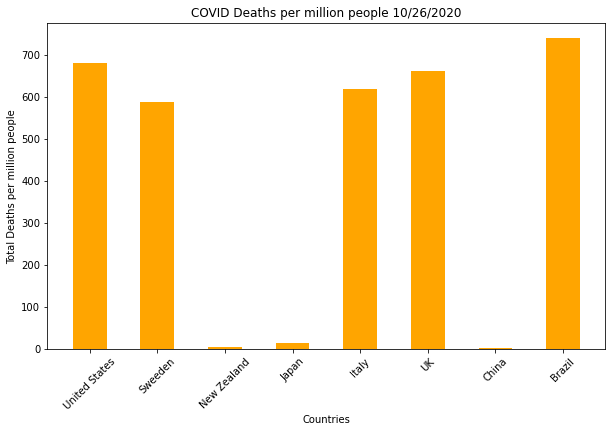

In [37]:
plt.figure(figsize=(10,6))
plt.xlabel("Countries")
plt.ylabel("Total Deaths per million people")
plt.xticks(rotation = 45)
plt.bar(x, array, color = "orange", width = .5)
plt.savefig("mortalityVspop.png")
plt.title("COVID Deaths per million people 10/26/2020")

Text(0.5, 1.0, 'COVID Total Cases per Km2 10/26/2020')

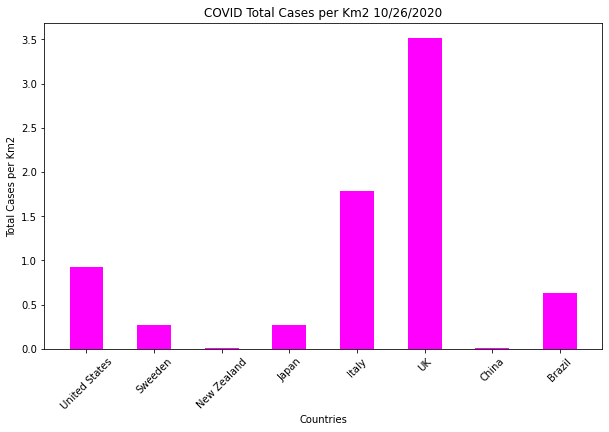

In [38]:
plt.figure(figsize=(10,6))
plt.xlabel("Countries")
plt.ylabel("Total Cases per Km2")
plt.xticks(rotation = 45)
plt.bar(x, arrays, color = "magenta", width = .5)
plt.savefig("casesPerKm.png")
plt.title("COVID Total Cases per Km2 10/26/2020")

In [46]:
# Generate scatter plots

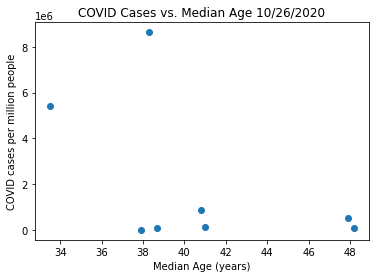

<Figure size 432x288 with 0 Axes>

In [40]:
plt.scatter(owid_4.iloc[:,6], owid_4.iloc[:,2])
plt.xlabel('Median Age (years)')
plt.ylabel('COVID cases per million people')
plt.title("COVID Cases vs. Median Age 10/26/2020")
plt.show()
plt.savefig("casesVsMedage.png")

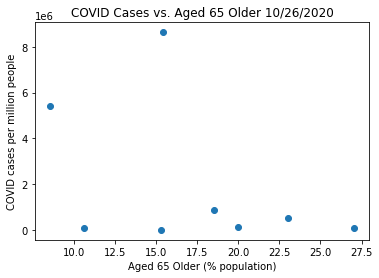

<Figure size 432x288 with 0 Axes>

In [41]:
plt.scatter(owid_4.iloc[:,7], owid_4.iloc[:,2])
plt.xlabel('Aged 65 Older (% population)')
plt.ylabel('COVID cases per million people')
plt.title("COVID Cases vs. Aged 65 Older 10/26/2020")
plt.show()
plt.savefig("casesVsage65.png")

In [42]:
# Obtain linear regression

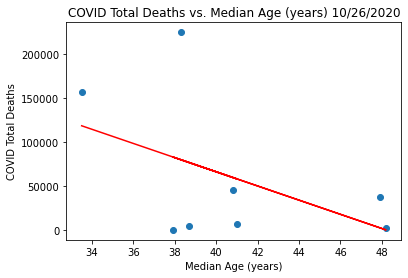

y = -8082.59 x + 389295.25
The r-value is: -0.4795286710526217
The p-value is: 0.22920858515649697


In [43]:
x_values = owid_4.iloc[:,6]
y_values = owid_4.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Median Age (years)")
plt.ylabel("COVID Total Deaths")
plt.title("COVID Total Deaths vs. Median Age (years) 10/26/2020")
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.savefig("deathVsMedage.png")
plt.show()
print(line_eq)
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

*Low negative correlation

*Insufficient evidence against Null hypothesis

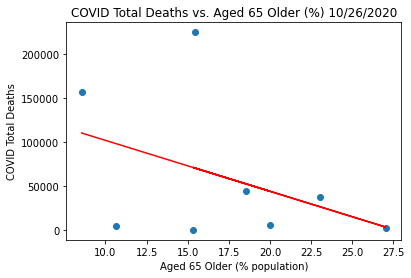

y = -5801.47 x + 160064.6
The r-value is: -0.4203218715494347
The p-value is: 0.29979984271262616


In [44]:
x_values = owid_4.iloc[:,7]
y_values = owid_4.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Aged 65 Older (% population)")
plt.ylabel("COVID Total Deaths")
plt.title("COVID Total Deaths vs. Aged 65 Older (%) 10/26/2020")
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.savefig("deathVsage65.png")
plt.show()
print(line_eq)
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

# Low negative correlation
*Insufficient evidence against Null hypothesis

*Low negative correlation

*Insufficient evidence against Null hypothesis